In [1]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Data collection and analysis
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# Getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features :
- Sex
- Smoker
- Region

In [6]:
print(insurance_dataset.sex.value_counts())

male      676
female    662
Name: sex, dtype: int64


In [7]:
print(insurance_dataset.smoker.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [8]:
print(insurance_dataset.region.value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


##### Data Analysis

In [9]:
# Statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\91932\AppData\Local\Temp\ipykernel_8136\215121745.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


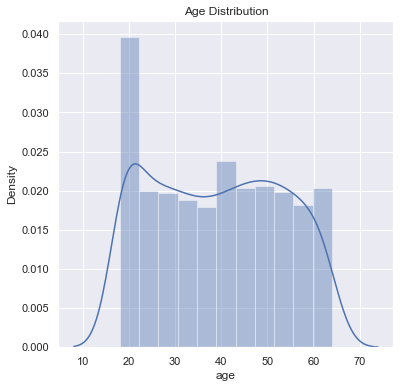

In [10]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

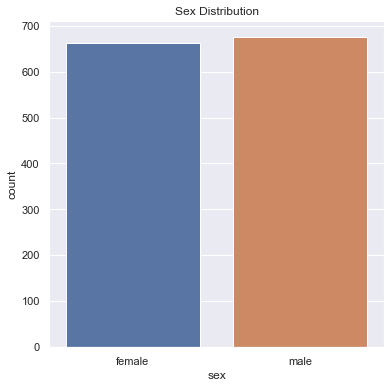

In [11]:
# Gender column
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex' , data = insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [12]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\91932\AppData\Local\Temp\ipykernel_8136\1321816330.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


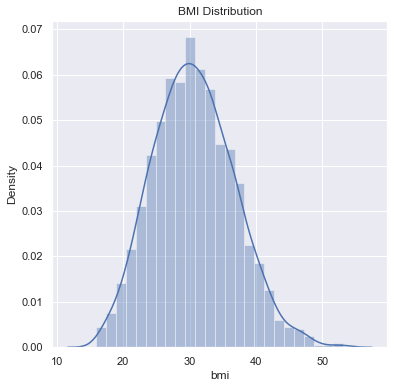

In [13]:
# Distribution of bmi 
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

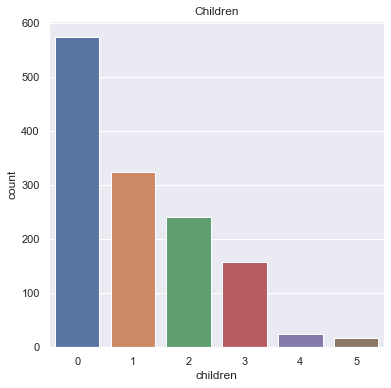

In [14]:
# Children column
plt.figure(figsize = (6,6))
sns.countplot(x = 'children' , data = insurance_dataset)
plt.title('Children')
plt.show()

In [15]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

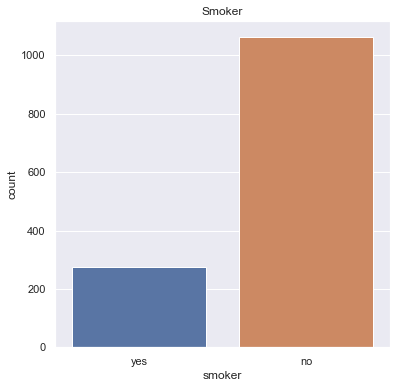

In [16]:
# Smoker column
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker' , data = insurance_dataset)
plt.title('Smoker')
plt.show()

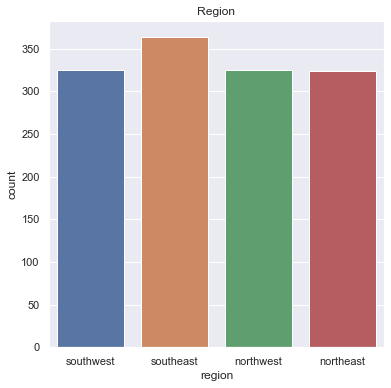

In [17]:
# Region column
plt.figure(figsize = (6,6))
sns.countplot(x = 'region' , data = insurance_dataset)
plt.title('Region')
plt.show()

C:\Users\91932\AppData\Local\Temp\ipykernel_8136\1293204067.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


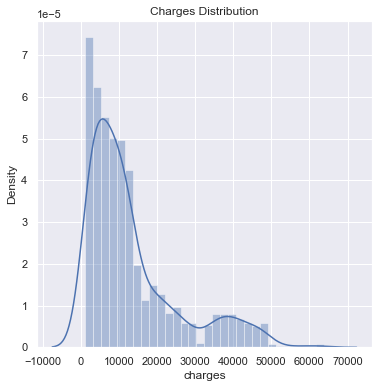

In [18]:
# Distribution of charges value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-processing 

In [19]:
# Encoding the categorical features
insurance_dataset.replace({'sex' : {'male':0,'female':1}},inplace=True)

insurance_dataset.replace({'smoker' : {'yes':0,'no':1}},inplace=True)

insurance_dataset.replace({'region' : {'southeast':0,'southwest':1 , 'northwest':2 , 'northeast':3}},inplace=True)

In [20]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [21]:
# Splitting the features and Target
X = insurance_dataset.drop(columns = 'charges' , axis = 1)
Y = insurance_dataset['charges']

In [22]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


Splitting the data into Training Data and Testing Data

In [23]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y ,test_size = 0.2 , random_state = 2)

In [24]:
print(X.shape , X_train.shape , X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [25]:
# Loading the linear regression model
regressor = LinearRegression()

In [26]:
regressor.fit(X_train , Y_train)

LinearRegression()

Model Evaluation

In [27]:
# Prediction on training data 
training_data_prediction = regressor.predict(X_train)

In [28]:
# R squared value 
r2_train = metrics.r2_score(Y_train , training_data_prediction)
print('R squared value : ',r2_train)

R squared value :  0.7518195459072954


In [29]:
# Prediction on test data 
test_data_prediction = regressor.predict(X_test)

In [30]:
# R squared value 
r2_train = metrics.r2_score(Y_test , test_data_prediction)
print('R squared value : ',r2_train)

R squared value :  0.7454471618659975


Building a Predictive System

In [31]:
input_data = (31,1,25.74,0,1,0)

# Changing input data to a numpy array 
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print("The insurance cost is USD ",prediction[0])

[3632.02043291]
The insurance cost is USD  3632.0204329083736


C:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
